In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Create Logistic Regression Class

Adopting sklearn style

In [2]:
class LogisticRegression():
    """
    Logistic Regression with Gradient Descent optimization

    Parameters
    ----------
    learning_rate: float, default = 0.1
        Learning rate of gradient descent

    tol : float, default = 1e-4
        Tolerance for stopping criteria
        The iterations will stop when 
        max(change in weights) / max(weights) < tol.

    max_iter : int, default = 100
        Maximum number of iterations taken for the solvers to converge

    Attributes
    ----------
    coef_ : ndarray of shape (n_features,)
        Coefficient of the features in the decision function

    intercept_ : ndarray of shape (1,)
    """
    def __init__(
        self,
        learning_rate = 0.1,
        max_iter = 100,
        tol = 1e-4,
    ):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def _initialize_parameters(self, X):
        """
        Initialize parameters: .coef_ and .intercept_
        
        .coef_ is between [-1/sqrt(N), 1/sqrt(N)]
        .intercept_ is zero
        """
        n_features = np.shape(X)[1]
        limit = 1 / np.sqrt(n_features)

        self.coef_ = np.random.uniform(-limit, limit, (n_features))
        self.intercept_ = np.zeros(1)

    def fit(self, X, y):
        """
        Fit the model according to the given training data

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Training vectori, where `n_samples` is the number of samples and
            `n_features` is the number of features

        y : array-like of shape (n_samples,)
            Target vector relative to X

        Returns
        --------
        self
            Fitted estimator
        """
        # Update the data
        X = np.array(X)
        y = np.array(y)

        # Initialize parameters
        self._initialize_parameters(X)

        # Tune parameters 
        for i in range(self.max_iter):
            # Make a new prediction
            y_pred = self.predict_proba(X = X)

            # Calculate gradient
            grad_coef_ = -(y - y_pred).dot(X)
            grad_intercept_ = -(y - y_pred).dot(np.ones(len(X)))

            # Update parameters
            self.coef_ -= self.learning_rate * grad_coef_
            self.intercept_ -= self.learning_rate * grad_intercept_

            # Break the iteration
            param_changes_ = np.abs(np.hstack((grad_coef_, grad_intercept_)))
            param_ = np.abs(np.hstack((self.coef_, self.intercept_)))
            if np.max(param_changes_)/np.max(param_) < self.tol:
                break
            
    def predict_proba(self, X):
        """
        Probability estimates.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Vector to be scored, where `n_samples` is the number of samples and
            `n_features` is the number of features

        Returns
        -------
        proba : array-like of shape (n_samples,)
            Returns the probability of the sample for each class in the model,
        """
        # Calculate the log odds
        logits = np.dot(X, self.coef_) + self.intercept_

        # Calculate the probability using sigmoid function
        # sigmoid(x) = 1 / (1 + e^(-x))
        proba = 1. / (1 + np.exp(-logits))

        return proba

    def predict(self, X):
        """
        Predict class

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Vector to be scored, where `n_samples` is the number of samples and
            `n_features` is the number of features

        Returns
        -------
        T : array-like of shape (n_samples,)
            Returns the probability of the sample for each class in the model,
        """
        return (self.predict_proba(X)>0.5).astype("int")


# Data

In [3]:
x_1 = [0, 1, 1, 0]
x_2 = [0, 0, 1, 1]
y = [0, 1, 1, 1]

data = pd.DataFrame({"x_1": x_1,
                     "x_2": x_2,
                     "y": y})

data

,x_1,x_2,y
0,0,0,0
1,1,0,1
2,1,1,1
3,0,1,1


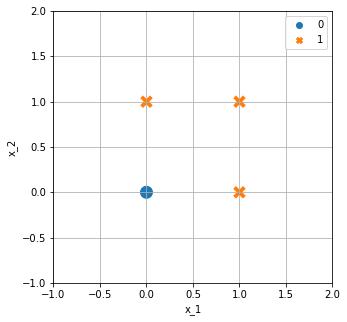

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# Plot data
sns.scatterplot(data = data,
                x = "x_1",
                y = "x_2",
                hue = "y",
                style = "y",
                s = 200,
                ax = ax)

plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.legend()
plt.grid()
plt.show()

# Modeling

In [5]:
X = data[["x_1", "x_2"]]
y = data["y"]

In [6]:
# Create an object
logreg = LogisticRegression()

In [7]:
# Fit the model
logreg.fit(X, y)

In [8]:
# Extract parameter
w = logreg.coef_
b = logreg.intercept_

print(f"coef        : {w}")
print(f"intercept   : {b}")

coef        : [2.69057205 2.44015141]
intercept   : [-0.62061107]


In [9]:
# Predict 
y_pred_proba = logreg.predict_proba(X)
y_pred = logreg.predict(X)

print(f"Predict proba : \n{y_pred_proba}")
print(f"Prediction    : \n{y_pred}")

Predict proba : 
[0.34964249 0.88794908 0.9891224  0.86051096]
Prediction    : 
[0 1 1 1]


In [10]:
data["y_pred"] = y_pred

# Decision Boundary

In [11]:
# Obtain DS slope & intercept
m = -w[0]/w[1]
c = -b[0]/w[1]

print(f"slope       : {m:.4f}")
print(f"intercept   : {c:.4f}")

slope       : -1.1026
intercept   : 0.2543


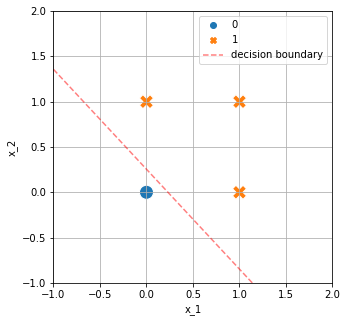

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# Plot data
sns.scatterplot(data = data,
                x = "x_1",
                y = "x_2",
                hue = "y_pred",
                style = "y_pred",
                s = 200,
                ax = ax)

# Plot decision boundary
x_ = np.linspace(-1, 2, 101)
y_ = m*x_ + c
ax.plot(x_, y_, "--r", alpha=0.5, label="decision boundary")

plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.legend()
plt.grid()
plt.show()